# ZADANIE 1

a) Wykonaj ponizszy skrypt i przeanalizuj go:

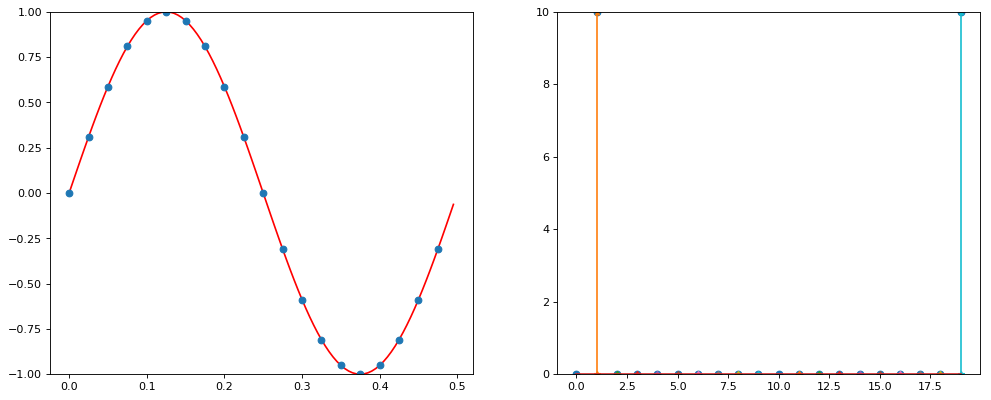

In [1]:
from __future__ import division
from pylab import *
from numpy import *
from scipy import *
from ipywidgets import *
import math as mt

%matplotlib inline

A = 1
# Amplituda sygnaĹu

LP = 1 
# Liczba analizowanych peĹnych przebiegĂłw sygnaĹu (okresĂłw)
w = 40           
# czĹstotliwoĹÄ probkowania [Hz] sygnaĹu 
#(jak czÄsto w ciÄgu sekundy pobieramy informacje o wartoĹci sygnaĹu)

f = 2.0           
# Czestotliwosc sygnalu [Hz]

T = 1.0/f        
# Okres sygnalu [s] (jak dĹugo trwa jeden przebieg sinusa)

TW = 1.0/w        
# Okres probkowania [s] (co ile sekund pobieramy prĂłbkÄ)

t = np.arange(0, LP*T, TW)
# generujemy momenty, w ktĂłrych pobieramy prĂłbki

n = len(t)
    
FUNC = lambda t : A*sin(2*pi*t*f)    
# def. funkcji (tutaj sinus)

signal = FUNC(t)                 
# funkcja sprobkowana

fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)
## --- POMOCNICZY SYGNAL
base_t = np.arange(0, LP*T, 1.0/200.0)
base_signal = FUNC(base_t)
ax.plot(base_t, base_signal, linestyle='-', color='red')
ax.set_ylim([min(base_signal), max(base_signal)])
## --- 
ax.plot(t, signal, 'o')

signal1 = fft(signal)
# sygnal w dziedzinie czestotliwosci 
signal1 = abs(signal1)        
# modul sygnalu

freqs = range(int(n))


ax = fig.add_subplot(122)
ymax = max(signal1)
if (ymax > 3.0):
    ax.set_ylim([0.0,ymax])
else:
    ax.set_ylim([0.0,3.0])
stem(freqs, signal1, '-*')

show()

UWAGA: do dalszych cwiczen warto powyzszy skrypt przeksztalacic na funkcje o wielu argumentach, typu: amplituda, czestotliosc probkowania, liczba przebiegow. Oczywiscie dla wygody, nalezy nadac wartosci domyslne argumentom funkcji.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
import math as mt

def analyze_signal(amplituda=1, czestotliwosc_probkowania=40, liczba_przebiegow=1, czestotliwosc_sygnalu=1.0):  
    A = amplituda  # Amplituda sygnału
    LP = liczba_przebiegow  # Liczba analizowanych pełnych przebiegów sygnału (okresów)
    w = czestotliwosc_probkowania  # Częstotliwość próbkowania [Hz] sygnału
    f = czestotliwosc_sygnalu  # Częstotliwość sygnału [Hz] (przekazana jako argument)
    
    T = 1.0/f  # Okres sygnału [s] (jak długo trwa jeden przebieg sinusa)
    TW = 1.0/w  # Okres próbkowania [s] (co ile sekund pobieramy próbkę)
    
    t = np.arange(0, LP*T, TW)  # Generujemy momenty, w których pobieramy próbki
    n = len(t)

    FUNC = lambda t: A * np.sin(2 * np.pi * t * f)  # Definicja funkcji (tutaj sinus)
    signal = FUNC(t)  # Funkcja sprobkowana

    # Rysowanie wykresów
    fig = plt.figure(figsize=(15, 6), dpi=80)
    
    # POMOCNICZY SYGNAŁ
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    
    ax = fig.add_subplot(121)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    
    # Wykres próbek
    ax.plot(t, signal, 'o')

    # Dodanie podpisów do osi dla wykresu w dziedzinie czasu
    ax.set_xlabel('Czas [s]')  # Oś X - czas w sekundach
    ax.set_ylabel('Amplituda')  # Oś Y - amplituda sygnału (jednostka zależna od sygnału)

    # Transformata Fouriera
    signal1 = fft(signal)
    signal1 = np.abs(signal1)  # Moduł sygnału

    # Skala częstotliwości
    freqs = np.fft.fftfreq(n, TW)  # Częstotliwości w Hz, od -f_s/2 do +f_s/2
    freqs = np.fft.fftshift(freqs)  # Przemieszczenie do zakresu 0 Hz - f_s/2
    
    # Wykres w dziedzinie częstotliwości
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if ymax > 3.0:
        ax.set_ylim([0.0, ymax])
    else:
        ax.set_ylim([0.0, 3.0])

    # Usuwamy część ujemną częstotliwości
    positive_freqs = freqs[freqs >= 0]
    positive_signal1 = signal1[freqs >= 0]
    
    ax.stem(positive_freqs, positive_signal1, '-*')

    # Dodanie podpisów do osi dla wykresu w dziedzinie częstotliwości
    ax.set_xlabel('Częstotliwość [Hz]')  # Oś X - częstotliwość w Hz
    ax.set_ylabel('Moduł transformacji Fouriera')  # Oś Y - moduł sygnału w dziedzinie częstotliwości

    # Wyświetlenie wykresów
    plt.show()


UWAGA DLA CHÄTNYCH: moĹźna wykorzystaÄ 'interact', dziÄki ktĂłremu moĹźna zmieniac parametry danej funkcji i na bieĹźÄco obserwowaÄ zmiany. PoniĹźszy kod przedstawia sposĂłb wykorzystania interact:

In [ ]:
from ipykernel.pylab.backend_inline import flush_figures

def prosta(a=2, b=0):
    x = linspace(-5, 5, 100, endpoint=False) # punkty na osi OX [s]
    f = lambda x : a*x + b
    y = f(x)   
    
    fig = plt.figure(figsize=(6, 3), dpi=80)
    ax = fig.add_subplot(111)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.plot(x, y)
    flush_figures()
    
interact(prosta, a=(-5,5,0.5), b=(-5,5,0.5))
    

b) Zmien czestotliwosc probkowania na 50Hz.

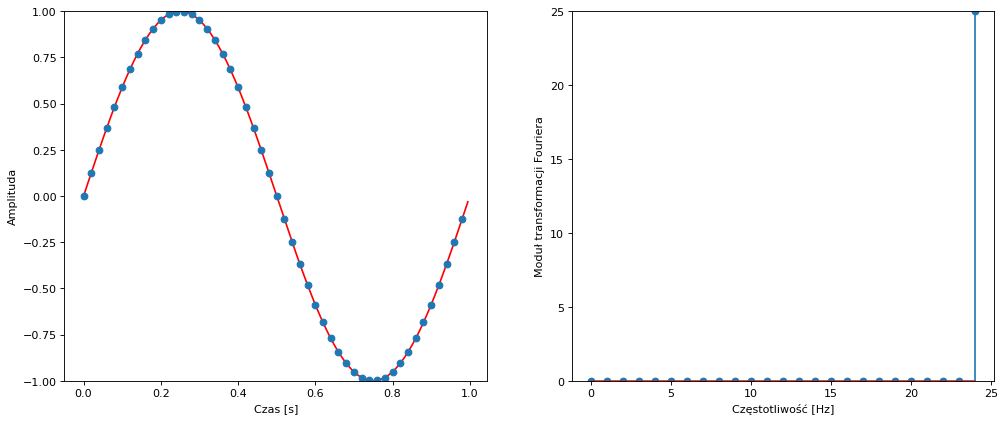

In [14]:
analyze_signal(czestotliwosc_probkowania=50)

c) Punkty na osi OX spektrum sa teraz kolejnymi liczbami naturalnymi, a nie czestotiwosci w Hz. Popraw skrypt (funkcje), tak aby os OX spektrum byla w Hz (podpowiedz: os OX rozpoczyna sie od 0Hz, a konczy sie na (prawie!)  Hz, gdzie  jest czestotliwosc probkowania). Nastepnie: Upewnij sie, ze spektrum dla 1Hz-owego sinusa i pieciu (LP=5) analizowanych przebiegow wyglada teraz prawidlowo.

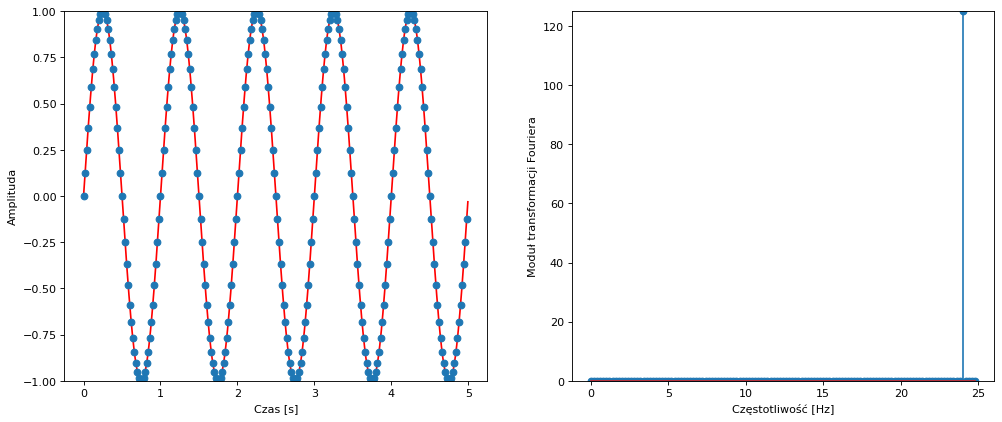

In [15]:
analyze_signal(amplituda=1, czestotliwosc_probkowania=50, liczba_przebiegow=5)

d) Podpisz osie obu wykresow, uzywajc funkcji xlabel() i ylabel(). Pamietaj o jednostkach.

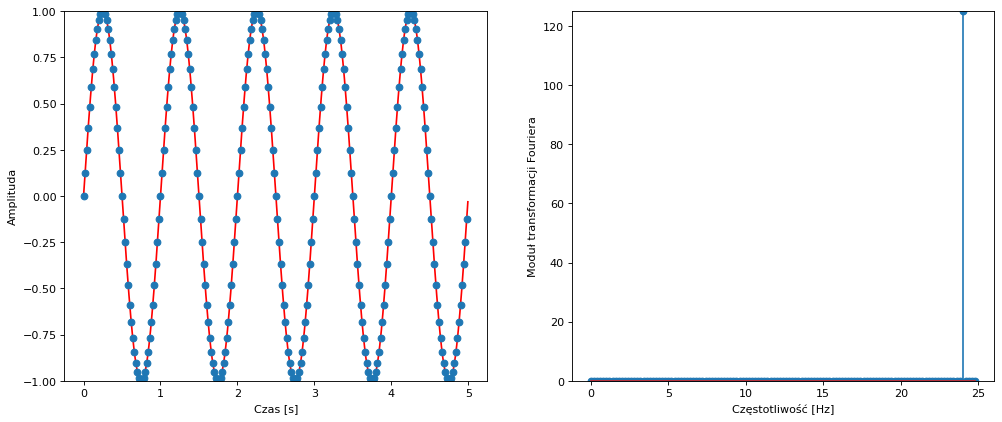

In [16]:
analyze_signal(amplituda=1, czestotliwosc_probkowania=50, liczba_przebiegow=5)

f) Porownaj spektrum funkcji $sin(2*pi*f*t)$, $2*sin(2*pi*f*t)$ i $3*sin(2*pi*f*t)$. Jak zmienia sie wartosc na osi OY na wykresie spektrum?

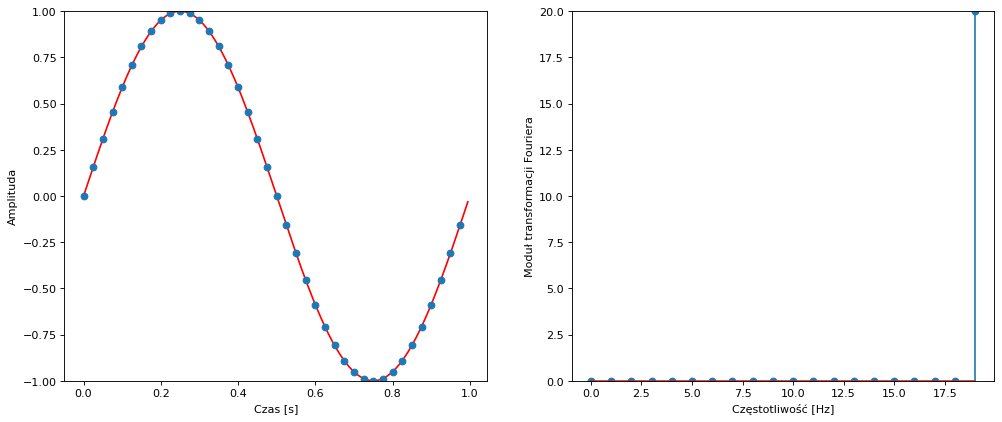

In [17]:
# f=1, A=1, LP=1
analyze_signal()

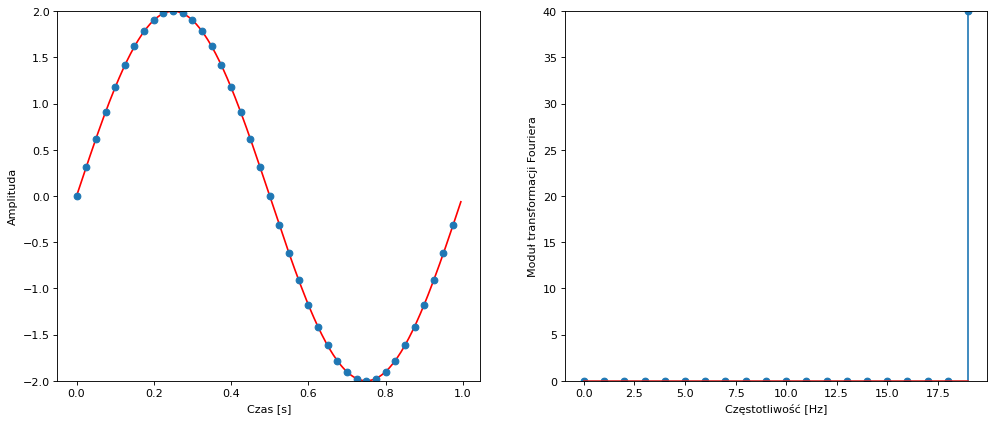

In [18]:
# f=1, A=2, LP=1
analyze_signal(amplituda=2)

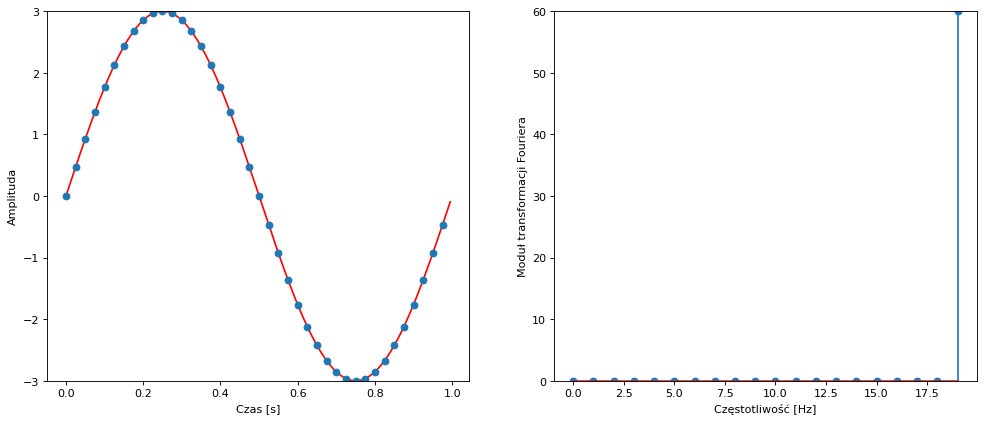

In [19]:
# f=1, A=3, LP=1
analyze_signal(amplituda=3)

g) Ile punktow jest na wykresach przy czestotliwosci probkowania 50Hz, T=1s? Zwieksz dwukrotnie liczbe probek poprzez zwiekszenie czestotliwosci probkowania. Nastepnie: dla $sin(2*pi*f*t)$ porownaj wartosc na osi OY spektrum uzyskane w tym oraz poprzednim punkcie.

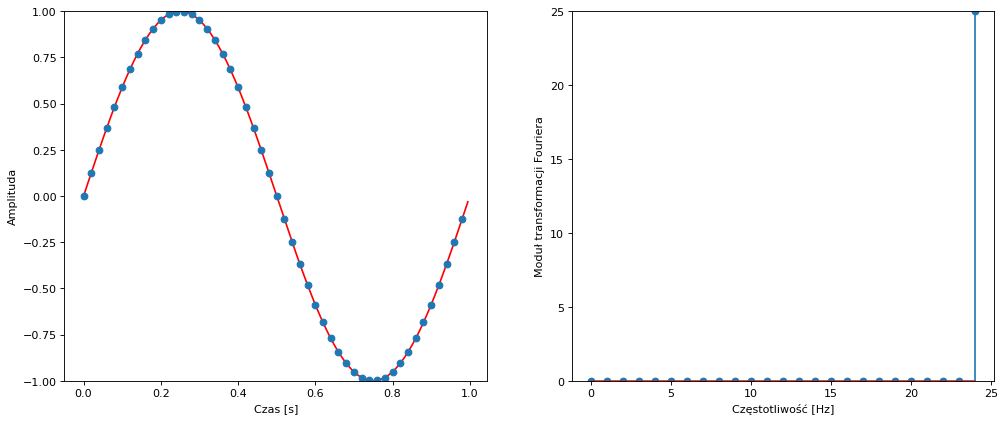

In [20]:
# f=1, w=50, LP=1
analyze_signal(czestotliwosc_probkowania=50)

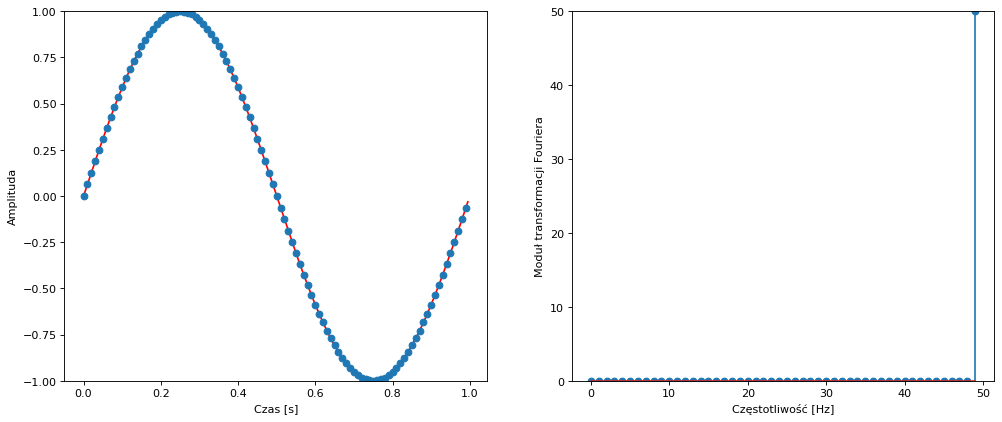

In [21]:
# f=1, w=100, LP=1
analyze_signal(czestotliwosc_probkowania=100)

In [ ]:
# popraw oĹ OY

# Zadanie 2

a) Wygeneruj spektrum dla funkcji sinus o czestotliwosiach 5Hz i 21Hz, dla czestotliwosci probkowania 20Hz i 20 (LP=20) analizowanych przebiegow. Czy rozpoznajesz te funkcje patrzac na ich sprobkowane wykresy? Odczytaj w drugim przypadku uzyskana czestotliwosc z FFT. Dlaczego uzyskano taki wynik?

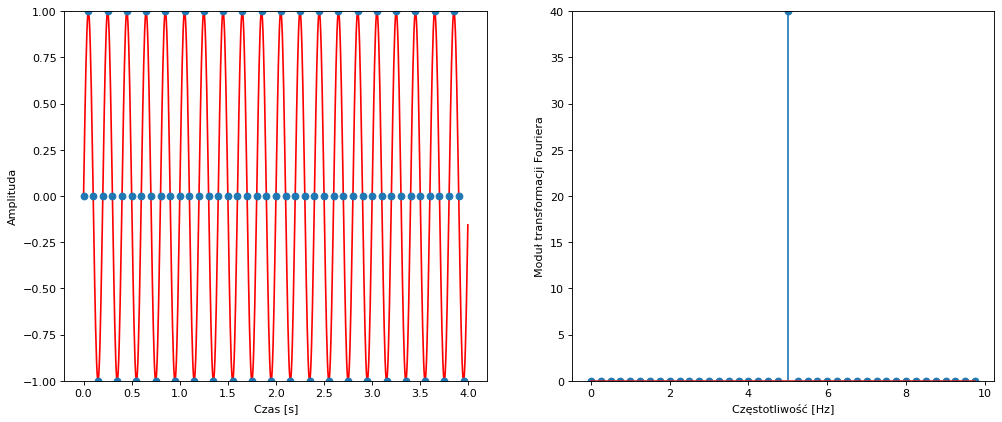

In [22]:
# f=5, w=20, LP=20
analyze_signal(czestotliwosc_probkowania=20, liczba_przebiegow=20, czestotliwosc_sygnalu=5)

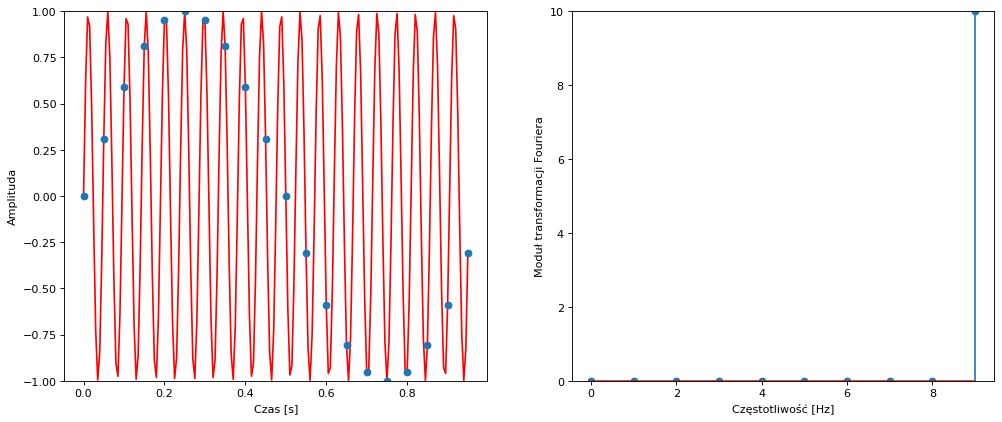

In [23]:
# f=21, w=20, LP=20
analyze_signal(czestotliwosc_probkowania=20, liczba_przebiegow=20, czestotliwosc_sygnalu=21)

Zwroc uwage, ze spektrum jest symetryczne (poza pierwszym elementem).

b) Przy w=100Hz, przeanalizuj widma sygnalow:

i) $sin(2*pi*t*f)$, $f=10Hz$

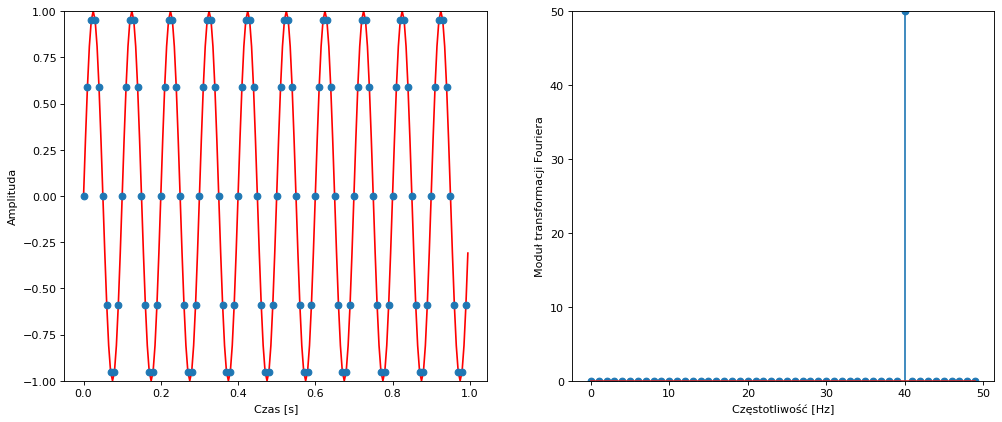

In [25]:
# f=10, w=100, A=1, LP=10
analyze_signal(czestotliwosc_probkowania=100, liczba_przebiegow=10, czestotliwosc_sygnalu=10)

ii) $sin(2*pi*t*f)$, $f=20Hz$

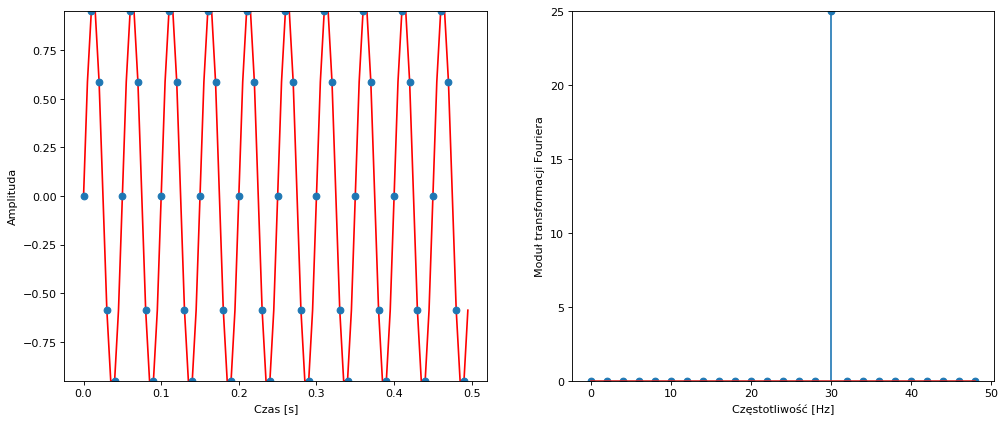

In [26]:
# f=20, w=100, A=1, LP=10
analyze_signal(czestotliwosc_probkowania=100, liczba_przebiegow=10, czestotliwosc_sygnalu=20)

iii) $sin(2*pi*t*f)$, $f=30Hz$ (tutaj slupki nie beda wygladac idealnie; dlaczego?)

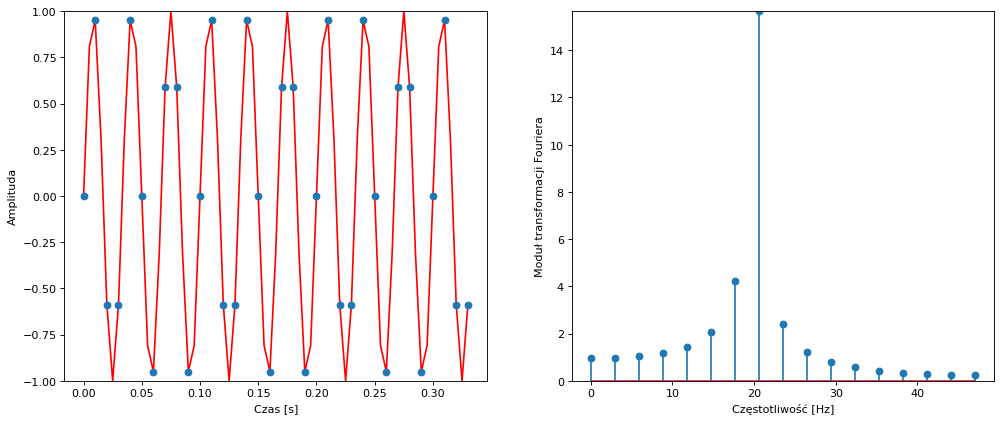

In [27]:
# f=30, w=100, A=1, LP=10
analyze_signal(czestotliwosc_probkowania=100, liczba_przebiegow=10, czestotliwosc_sygnalu=30)

In [ ]:
Widoczne jest "rozmycie" sygnalu, poniewaz wykorzystujemy liczby dyskretne, ktore niedokladnie pokrywaja
czestotliwosc sygnalu z czestotliwoscia probkowania i odbierane sa na sasiednich slupkach

iv) $sin(2*pi*t*f)$, $f=40Hz$

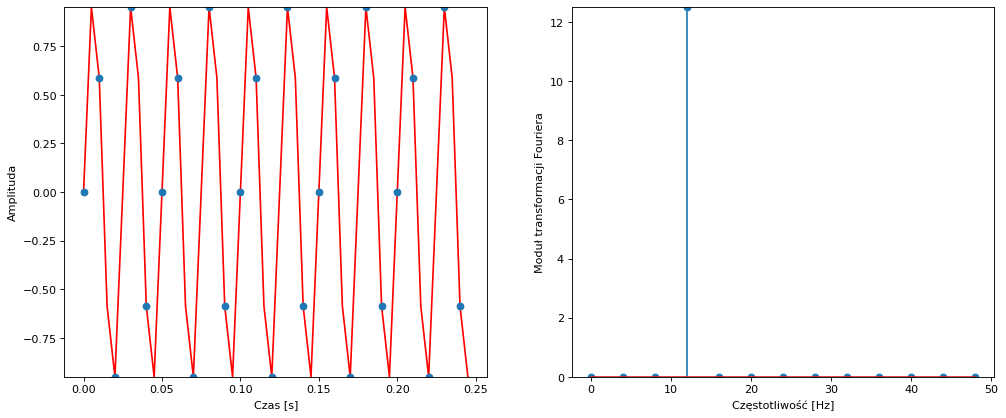

In [28]:
# f=40, w=100, A=1, LP=10
analyze_signal(czestotliwosc_probkowania=100, liczba_przebiegow=10, czestotliwosc_sygnalu=40)

c) Przy F=50Hz, w=100Hz, wygeneruj spektrum dla $sin(2*pi*f*t)$. Zwroc uwage na skale wykresow.

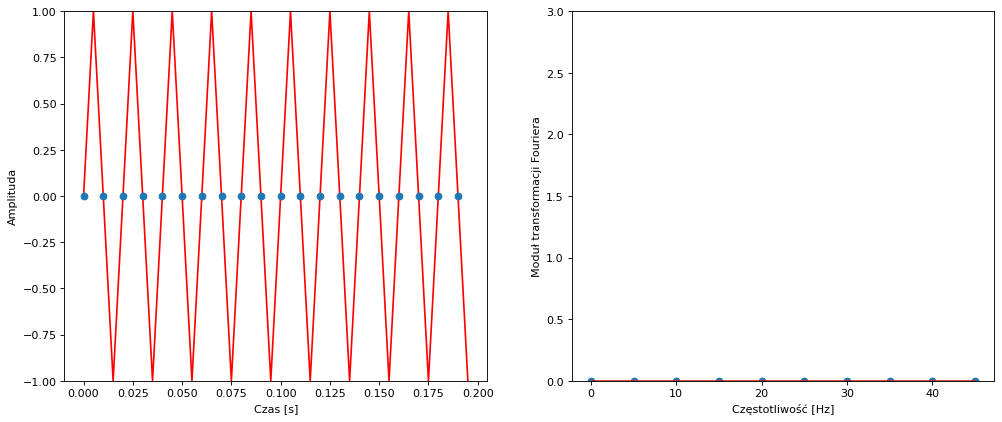

In [29]:
# f=50, w=100, A=1, LP=10
analyze_signal(czestotliwosc_probkowania=100, liczba_przebiegow=10, czestotliwosc_sygnalu=50)

c) Jak sie nazywa twierdzenie, ktorego konsekwencja jest takie zachowanie sie spektrum?
zjawsiko aliasingu - czestotliowsc sygnalu jest rowna (lub wieksza) polowie czestotliwosci probkowania, co sprawia, ze wszystkie odczyty pobane sa kiedy funkcja ma wartosc w tym przypadu 0

# Zadanie 3

Ponizsze przypadki skladaja sie z zlozonych sygnalow. Trzeba teraz bedzie zmodyfikowac troche FUNC

a) $sin(2*pi*t*f) + 2*sin(4*pi*t*f)$, T=1s, w=20Hz.

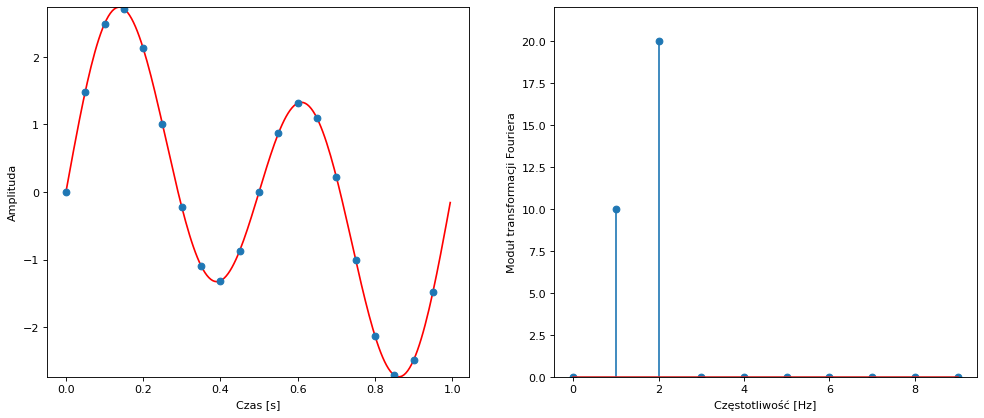

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

def analyze_signal(amplituda=1, czestotliwosc_probkowania=40, liczba_przebiegow=1, czestotliwosc_sygnalu=1.0):  
    A = amplituda  # Amplituda sygnału (dla pierwszej składowej)
    LP = liczba_przebiegow  # Liczba analizowanych pełnych przebiegów sygnału (okresów)
    w = czestotliwosc_probkowania  # Częstotliwość próbkowania [Hz] sygnału
    f = czestotliwosc_sygnalu  # Częstotliwość podstawowej składowej sygnału [Hz]
    
    T = 1.0/f  # Okres podstawowej składowej sygnału [s]
    TW = 1.0/w  # Okres próbkowania [s]
    
    t = np.arange(0, LP*T, TW)  # Generujemy momenty, w których pobieramy próbki
    n = len(t)

    # Definicja funkcji: suma dwóch sinusoid
    FUNC = lambda t: A * np.sin(2 * np.pi * t * f) + 2 * A * np.sin(4 * np.pi * t * f)
    signal = FUNC(t)  # Funkcja sprobkowana

    # Rysowanie wykresów
    fig = plt.figure(figsize=(15, 6), dpi=80)
    
    # POMOCNICZY SYGNAŁ
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    
    ax = fig.add_subplot(121)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    
    # Wykres próbek
    ax.plot(t, signal, 'o')

    # Dodanie podpisów do osi dla wykresu w dziedzinie czasu
    ax.set_xlabel('Czas [s]')  # Oś X - czas w sekundach
    ax.set_ylabel('Amplituda')  # Oś Y - amplituda sygnału (jednostka zależna od sygnału)

    # Transformata Fouriera
    signal1 = fft(signal)
    signal1 = np.abs(signal1)  # Moduł sygnału

    # Skala częstotliwości
    freqs = np.fft.fftfreq(n, TW)  # Częstotliwości w Hz
    freqs = np.fft.fftshift(freqs)  # Przemieszczenie do zakresu 0 Hz - f_s/2

    # Wykres w dziedzinie częstotliwości
    ax = fig.add_subplot(122)
    positive_freqs = freqs[freqs >= 0]
    positive_signal1 = signal1[np.fft.fftshift(freqs) >= 0]
    
    ax.stem(positive_freqs, positive_signal1, '-*')

    ymax = max(positive_signal1)
    ax.set_ylim([0.0, ymax * 1.1])

    # Dodanie podpisów do osi dla wykresu w dziedzinie częstotliwości
    ax.set_xlabel('Częstotliwość [Hz]')  # Oś X - częstotliwość w Hz
    ax.set_ylabel('Moduł transformacji Fouriera')  # Oś Y - moduł sygnału w dziedzinie częstotliwości

    # Wyświetlenie wykresów
    plt.show()

analyze_signal(czestotliwosc_probkowania=20, liczba_przebiegow=1)


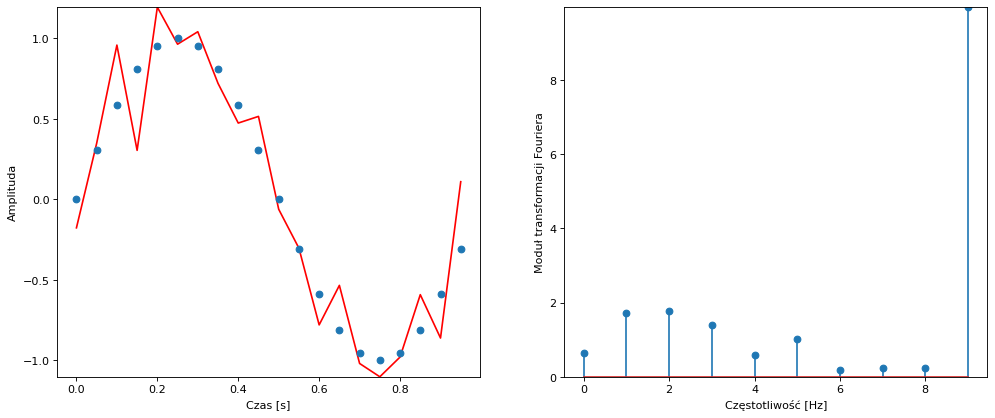

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

def analyze_signal(amplituda=1, czestotliwosc_probkowania=40, liczba_przebiegow=1, czestotliwosc_sygnalu=1.0):  
    A = amplituda  # Amplituda sygnału
    LP = liczba_przebiegow  # Liczba analizowanych pełnych przebiegów sygnału (okresów)
    w = czestotliwosc_probkowania  # Częstotliwość próbkowania [Hz] sygnału
    f = czestotliwosc_sygnalu  # Częstotliwość sygnału [Hz] (przekazana jako argument)
    
    T = 1.0/f  # Okres sygnału [s] (jak długo trwa jeden przebieg sinusa)
    TW = 1.0/w  # Okres próbkowania [s] (co ile sekund pobieramy próbkę)
    
    t = np.arange(0, LP*T, TW)  # Generujemy momenty, w których pobieramy próbki
    n = len(t)

    FUNC = lambda t: A * np.sin(2 * np.pi * t * f)  # Definicja funkcji (tutaj sinus)
    signal = FUNC(t)  # Funkcja sprobkowana

    noise_signal = np.zeros_like(t)
    for _ in range(100):  # Dodanie 100 sinusoid
        noise_amplitude = np.random.uniform(0.02, 0.08)
        noise_frequency = np.random.uniform(5.0, 10.0)
        noise_phase = np.random.uniform(0, 2 * np.pi)
        noise_signal += noise_amplitude * np.sin(2 * np.pi * noise_frequency * t + noise_phase)

    # Kombinacja sygnałów
    combined_signal = signal + noise_signal

    # Rysowanie wykresów
    fig = plt.figure(figsize=(15, 6), dpi=80)
    
    # Wykres w dziedzinie czasu
    ax = fig.add_subplot(121)
    ax.plot(t, combined_signal, linestyle='-', color='red')
    ax.plot(t, signal, 'o')

    ax.set_ylim([min(combined_signal), max(combined_signal)])
    ax.set_xlabel('Czas [s]')  # Oś X - czas w sekundach
    ax.set_ylabel('Amplituda')  # Oś Y - amplituda sygnału (jednostka zależna od sygnału)

    # Transformata Fouriera
    signal1 = fft(combined_signal)
    signal1 = np.abs(signal1)  # Moduł sygnału

    # Skala częstotliwości
    freqs = np.fft.fftfreq(n, TW)  # Częstotliwości w Hz, od -f_s/2 do +f_s/2
    freqs = np.fft.fftshift(freqs)  # Przemieszczenie do zakresu 0 Hz - f_s/2
    
    # Wykres w dziedzinie częstotliwości
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if ymax > 3.0:
        ax.set_ylim([0.0, ymax])
    else:
        ax.set_ylim([0.0, 3.0])

    # Usuwamy część ujemną częstotliwości
    positive_freqs = freqs[freqs >= 0]
    positive_signal1 = signal1[freqs >= 0]
    
    ax.stem(positive_freqs, positive_signal1, '-*')

    # Dodanie podpisów do osi dla wykresu w dziedzinie częstotliwości
    ax.set_xlabel('Częstotliwość [Hz]')  # Oś X - częstotliwość w Hz
    ax.set_ylabel('Moduł transformacji Fouriera')  # Oś Y - moduł sygnału w dziedzinie częstotliwości

    # Wyświetlenie wykresów
    plt.show()

# Wywołanie funkcji z przykładowymi parametrami
analyze_signal(czestotliwosc_probkowania=20, liczba_przebiegow=1)


d) $0.5 + 2*sin(2*pi*t*f)$, T=1s, w=20Hz. Czy amplituda zerowego prÄĹźka jest prawidlowa? Dlaczego? (Podpowiedz: zwroc jeszcze raz uwage na âsymetriÄâ spektrum).

In [ ]:
# Wyrysuj sygnaĹ


e) $sin(2*pi*t*f)$ oraz $sin(2*pi*t*f + pi/4)$ dla T=1s, w=20Hz. Czy informacja o fazie zniknela? Poszukaj ĹladĂłw tej informacji w tablicy, bedacej wynikiem operacji fft(signal). (funkcja angle(sygnal, deg=True)

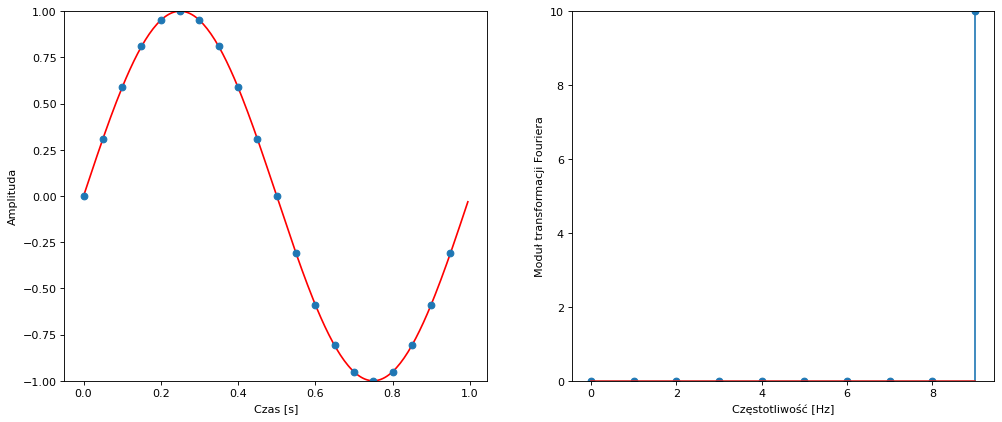

In [62]:
# faza = 0
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
import math as mt

def analyze_signal(amplituda=1, czestotliwosc_probkowania=40, liczba_przebiegow=1, czestotliwosc_sygnalu=1.0):  
    A = amplituda  # Amplituda sygnału
    LP = liczba_przebiegow  # Liczba analizowanych pełnych przebiegów sygnału (okresów)
    w = czestotliwosc_probkowania  # Częstotliwość próbkowania [Hz] sygnału
    f = czestotliwosc_sygnalu  # Częstotliwość sygnału [Hz] (przekazana jako argument)
    
    T = 1.0/f  # Okres sygnału [s] (jak długo trwa jeden przebieg sinusa)
    TW = 1.0/w  # Okres próbkowania [s] (co ile sekund pobieramy próbkę)
    
    t = np.arange(0, LP*T, TW)  # Generujemy momenty, w których pobieramy próbki
    n = len(t)

    FUNC = lambda t: A * np.sin(2 * np.pi * t * f)  # Definicja funkcji (tutaj sinus)
    signal = FUNC(t)  # Funkcja sprobkowana

    # Rysowanie wykresów
    fig = plt.figure(figsize=(15, 6), dpi=80)
    
    # POMOCNICZY SYGNAŁ
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    
    ax = fig.add_subplot(121)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    
    # Wykres próbek
    ax.plot(t, signal, 'o')

    # Dodanie podpisów do osi dla wykresu w dziedzinie czasu
    ax.set_xlabel('Czas [s]')  # Oś X - czas w sekundach
    ax.set_ylabel('Amplituda')  # Oś Y - amplituda sygnału (jednostka zależna od sygnału)

    # Transformata Fouriera
    signal1 = fft(signal)
    signal1 = np.abs(signal1)  # Moduł sygnału

    # Skala częstotliwości
    freqs = np.fft.fftfreq(n, TW)  # Częstotliwości w Hz, od -f_s/2 do +f_s/2
    freqs = np.fft.fftshift(freqs)  # Przemieszczenie do zakresu 0 Hz - f_s/2
    
    # Wykres w dziedzinie częstotliwości
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if ymax > 3.0:
        ax.set_ylim([0.0, ymax])
    else:
        ax.set_ylim([0.0, 3.0])

    # Usuwamy część ujemną częstotliwości
    positive_freqs = freqs[freqs >= 0]
    positive_signal1 = signal1[freqs >= 0]
    
    ax.stem(positive_freqs, positive_signal1, '-*')

    # Dodanie podpisów do osi dla wykresu w dziedzinie częstotliwości
    ax.set_xlabel('Częstotliwość [Hz]')  # Oś X - częstotliwość w Hz
    ax.set_ylabel('Moduł transformacji Fouriera')  # Oś Y - moduł sygnału w dziedzinie częstotliwości

    # Wyświetlenie wykresów
    plt.show()

analyze_signal(czestotliwosc_probkowania=20, liczba_przebiegow=1)


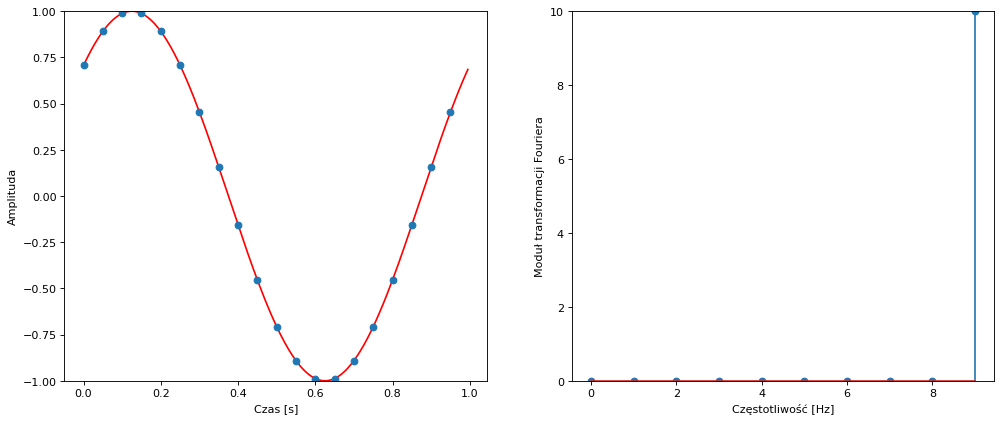

In [64]:
# faza = pi/4
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
import math as mt

def analyze_signal(amplituda=1, czestotliwosc_probkowania=40, liczba_przebiegow=1, czestotliwosc_sygnalu=1.0):  
    A = amplituda  # Amplituda sygnału
    LP = liczba_przebiegow  # Liczba analizowanych pełnych przebiegów sygnału (okresów)
    w = czestotliwosc_probkowania  # Częstotliwość próbkowania [Hz] sygnału
    f = czestotliwosc_sygnalu  # Częstotliwość sygnału [Hz] (przekazana jako argument)
    
    T = 1.0/f  # Okres sygnału [s] (jak długo trwa jeden przebieg sinusa)
    TW = 1.0/w  # Okres próbkowania [s] (co ile sekund pobieramy próbkę)
    
    t = np.arange(0, LP*T, TW)  # Generujemy momenty, w których pobieramy próbki
    n = len(t)

    FUNC = lambda t: A * np.sin(2 * np.pi * t * f + np.pi/4)  # Definicja funkcji (tutaj sinus)
    signal = FUNC(t)  # Funkcja sprobkowana

    # Rysowanie wykresów
    fig = plt.figure(figsize=(15, 6), dpi=80)
    
    # POMOCNICZY SYGNAŁ
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    
    ax = fig.add_subplot(121)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    
    # Wykres próbek
    ax.plot(t, signal, 'o')

    # Dodanie podpisów do osi dla wykresu w dziedzinie czasu
    ax.set_xlabel('Czas [s]')  # Oś X - czas w sekundach
    ax.set_ylabel('Amplituda')  # Oś Y - amplituda sygnału (jednostka zależna od sygnału)

    # Transformata Fouriera
    signal1 = fft(signal)
    signal1 = np.abs(signal1)  # Moduł sygnału

    # Skala częstotliwości
    freqs = np.fft.fftfreq(n, TW)  # Częstotliwości w Hz, od -f_s/2 do +f_s/2
    freqs = np.fft.fftshift(freqs)  # Przemieszczenie do zakresu 0 Hz - f_s/2
    
    # Wykres w dziedzinie częstotliwości
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if ymax > 3.0:
        ax.set_ylim([0.0, ymax])
    else:
        ax.set_ylim([0.0, 3.0])

    # Usuwamy część ujemną częstotliwości
    positive_freqs = freqs[freqs >= 0]
    positive_signal1 = signal1[freqs >= 0]
    
    ax.stem(positive_freqs, positive_signal1, '-*')

    # Dodanie podpisów do osi dla wykresu w dziedzinie częstotliwości
    ax.set_xlabel('Częstotliwość [Hz]')  # Oś X - częstotliwość w Hz
    ax.set_ylabel('Moduł transformacji Fouriera')  # Oś Y - moduł sygnału w dziedzinie częstotliwości

    # Wyświetlenie wykresów
    plt.show()

analyze_signal(czestotliwosc_probkowania=20, liczba_przebiegow=1)


# Zadanie 4

Oblicz wynik ifft(fft(x)), gdzie x=random.random(10). Czy jakas informacja zostala stracona?

In [68]:
# wygeneruj wektor x
import numpy as np
from scipy.fft import fft, ifft

# Generowanie losowego sygnału
x = np.random.random(10)
print(x)

[0.82660445 0.43810936 0.30687617 0.27391608 0.04451996 0.41414113
 0.91215867 0.53994866 0.11528225 0.65767868]


In [69]:
# oblicz fft z x
fft_result = fft(x)
print(fft_result)

[ 4.52923541-0.j          0.4039613 +0.70984021j  0.87502892-0.88533674j
  0.68637322+0.99024234j -0.03778268+0.05430302j -0.1183524 -0.j
 -0.03778268-0.05430302j  0.68637322-0.99024234j  0.87502892+0.88533674j
  0.4039613 -0.70984021j]


In [71]:
# oblicz ifft
ifft_result = ifft(fft_result)
print(ifft_result)

[0.82660445+0.j 0.43810936+0.j 0.30687617+0.j 0.27391608+0.j
 0.04451996+0.j 0.41414113+0.j 0.91215867+0.j 0.53994866+0.j
 0.11528225+0.j 0.65767868+0.j]
